<a href="https://colab.research.google.com/github/RayOfLight07/Elements_of_AI_ML/blob/main/Experiment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective:
Implement any clustering techniques using Scikit-learn on cleaned data from a previous
lab. Analyze the performance of the clustering algorithm and discuss the results.

# **Importing the dataset**

In [1]:
from google.colab import files
ss= files.upload()

Saving clustering_dataset.csv to clustering_dataset.csv


# **Step 1: Load the Dataset**

In [3]:
import pandas as pd

# Load the cleaned dataset
file_path = 'clustering_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   Feature_1  Feature_2
0   5.745071   4.792604
1   5.971533   7.284545
2   4.648770   4.648795
3   7.368819   6.151152
4   4.295788   5.813840


# **Step 2: Data Preprocessing**

In [4]:
from sklearn.preprocessing import StandardScaler

# Extract the numerical features for clustering
features = data.select_dtypes(include=['float64', 'int64'])

# Standard Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


# **Step 3: Perform Clustering**

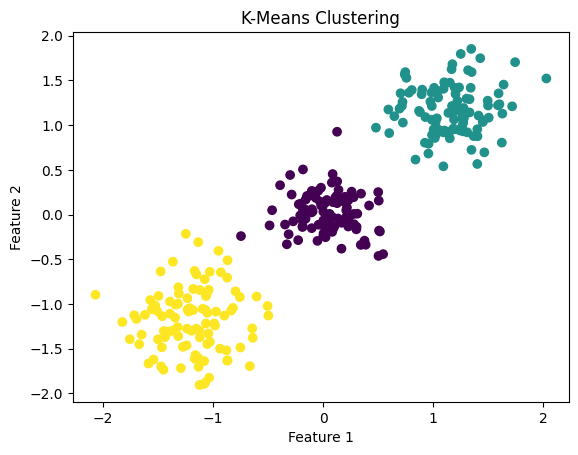

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize K-Means
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit and predict cluster labels
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Visualize the clusters (assuming 2 features for simplicity)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# **Step 4: Evaluate Performance**

In [6]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score (K-Means): {silhouette}')

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(scaled_features, clusters)
print(f'Davies-Bouldin Index (K-Means): {davies_bouldin}')


Silhouette Score (K-Means): 0.6886950012754051
Davies-Bouldin Index (K-Means): 0.4054637225440707


# **Step 5: Compare Algorithm**

In [11]:
import numpy as np

# Check unique cluster labels
print("Unique cluster labels:", np.unique(dbscan_clusters))

# Count points per cluster
unique, counts = np.unique(dbscan_clusters, return_counts=True)
print("Cluster label counts:", dict(zip(unique, counts)))


Unique cluster labels: [0]
Cluster label counts: {0: 300}


In [12]:
from sklearn.cluster import DBSCAN

# Adjust DBSCAN parameters
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_features)

# Check cluster labels again
print("Unique cluster labels after adjustment:", np.unique(dbscan_clusters))


Unique cluster labels after adjustment: [0]


In [13]:
# Exclude noise points for silhouette score
valid_indices = dbscan_clusters != -1
if len(np.unique(dbscan_clusters[valid_indices])) > 1:
    silhouette_dbscan = silhouette_score(scaled_features[valid_indices], dbscan_clusters[valid_indices])
    print(f'Silhouette Score (DBSCAN): {silhouette_dbscan}')
else:
    print("Cannot calculate Silhouette Score: Less than 2 clusters found.")


Cannot calculate Silhouette Score: Less than 2 clusters found.


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(scaled_features, test_size=0.2, random_state=42)

# Perform clustering on training data
kmeans.fit(X_train)
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

# Evaluate on train/test subsets
train_silhouette = silhouette_score(X_train, train_clusters)
test_silhouette = silhouette_score(X_test, test_clusters)

print(f'Training Silhouette Score: {train_silhouette}')
print(f'Testing Silhouette Score: {test_silhouette}')


Training Silhouette Score: 0.687034100011104
Testing Silhouette Score: 0.6909939618495374
